In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from LSTM_for_Stock.data_processor import DataLoader
from LSTM_for_Stock.model import Model
import seaborn as sns

Using TensorFlow backend.


In [5]:
import matplotlib.pyplot as plt
def plot(x=[1,2,3,4,5,6],y=[[3,3.3,3.7],[5,5.2,5.6]],window=0,step=0):
    fig = plt.figure(figsize=(50,15))
    ax = fig.add_subplot(111)
    ax.plot(x, label='True Data')
    for i,data in enumerate(y):
#         print(data)
        n=[None for p in range(window)]+[None for p in range(i*step)]+list(data)
        plt.plot(n,color='r')
#         print(n)
    plt.show()

In [6]:
dataloader = DataLoader('601398', '399300')
model = Model()
comp = {"optimizer": "adam",
        "loss": "mse",
        "metrics": [
            "mae",
            "acc"
        ]}
norm = True
days = 15
window = 120
layers = [{'units': 50, 'type': 'lstm','return_sequences':True},
          {'units': 100, 'type': 'lstm','return_sequences':True},
          {'units': 50, 'type': 'lstm','return_sequences':True},
          {'units': 25, 'type': 'lstm','return_sequences':True},
          {'units': 10, 'type': 'lstm','return_sequences':False},
    {'units': days, 'type': 'dense'}]
train = {'epochs': 10, 'verbose': 2, 'validation_split': 0.15}
evaluate={}
model.build_model(layers, comp)
# X_val,Y_val=dataloader.get_valid_data(window,days, norm)
# score=model.evaluate(X_val,Y_val,evaluate)
# for i in range(len(model.model.metrics_names)):
#     print('{0}:{1}'.format(model.model.metrics_names[i],score[i]))

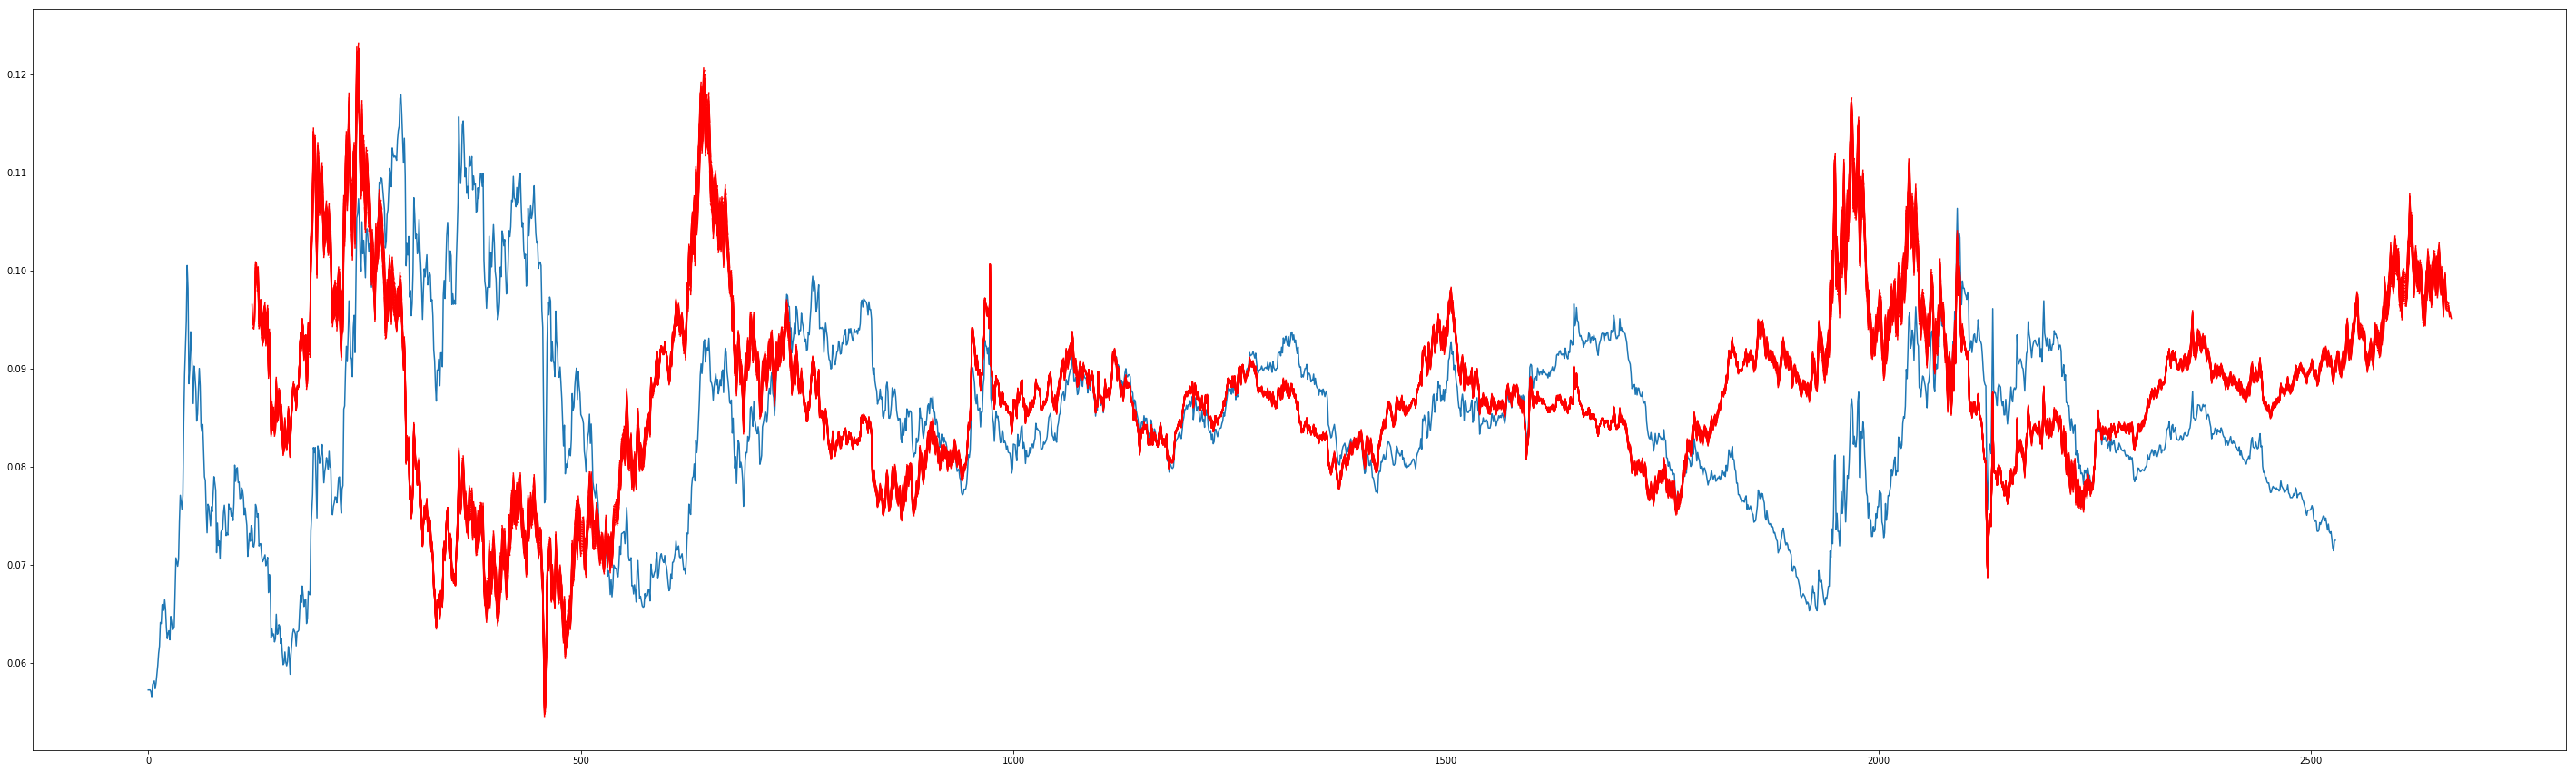

In [7]:
X, Y = dataloader.get_train_data(window, days, norm)
plot(X[:,0,0],list(Y),window=window,step=1)

In [8]:
history = model.train(X, Y, train)

Train on 2149 samples, validate on 380 samples
Epoch 1/10
 - 16s - loss: 0.0014 - mean_absolute_error: 0.0245 - acc: 0.0619 - val_loss: 4.1701e-05 - val_mean_absolute_error: 0.0050 - val_acc: 0.1395
Epoch 2/10
 - 13s - loss: 6.3479e-05 - mean_absolute_error: 0.0058 - acc: 0.0656 - val_loss: 8.1429e-05 - val_mean_absolute_error: 0.0079 - val_acc: 0.0395
Epoch 3/10
 - 12s - loss: 6.2663e-05 - mean_absolute_error: 0.0059 - acc: 0.0670 - val_loss: 6.2062e-05 - val_mean_absolute_error: 0.0066 - val_acc: 0.0368
Epoch 4/10
 - 12s - loss: 5.0597e-05 - mean_absolute_error: 0.0052 - acc: 0.0633 - val_loss: 2.7201e-05 - val_mean_absolute_error: 0.0038 - val_acc: 0.1684
Epoch 5/10
 - 13s - loss: 4.3616e-05 - mean_absolute_error: 0.0049 - acc: 0.0591 - val_loss: 2.6949e-05 - val_mean_absolute_error: 0.0039 - val_acc: 0.0474
Epoch 6/10
 - 12s - loss: 4.3817e-05 - mean_absolute_error: 0.0050 - acc: 0.0614 - val_loss: 9.9564e-05 - val_mean_absolute_error: 0.0090 - val_acc: 0.0289
Epoch 7/10
 - 12s - l

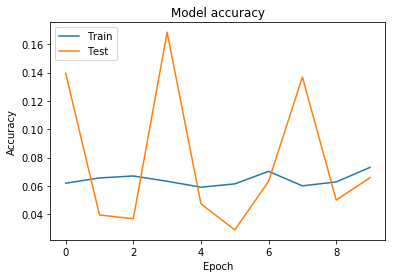

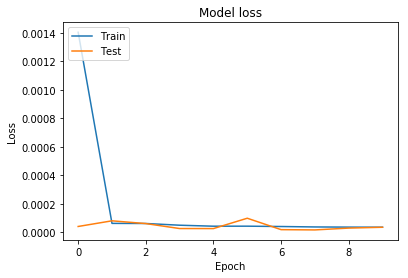

In [9]:
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

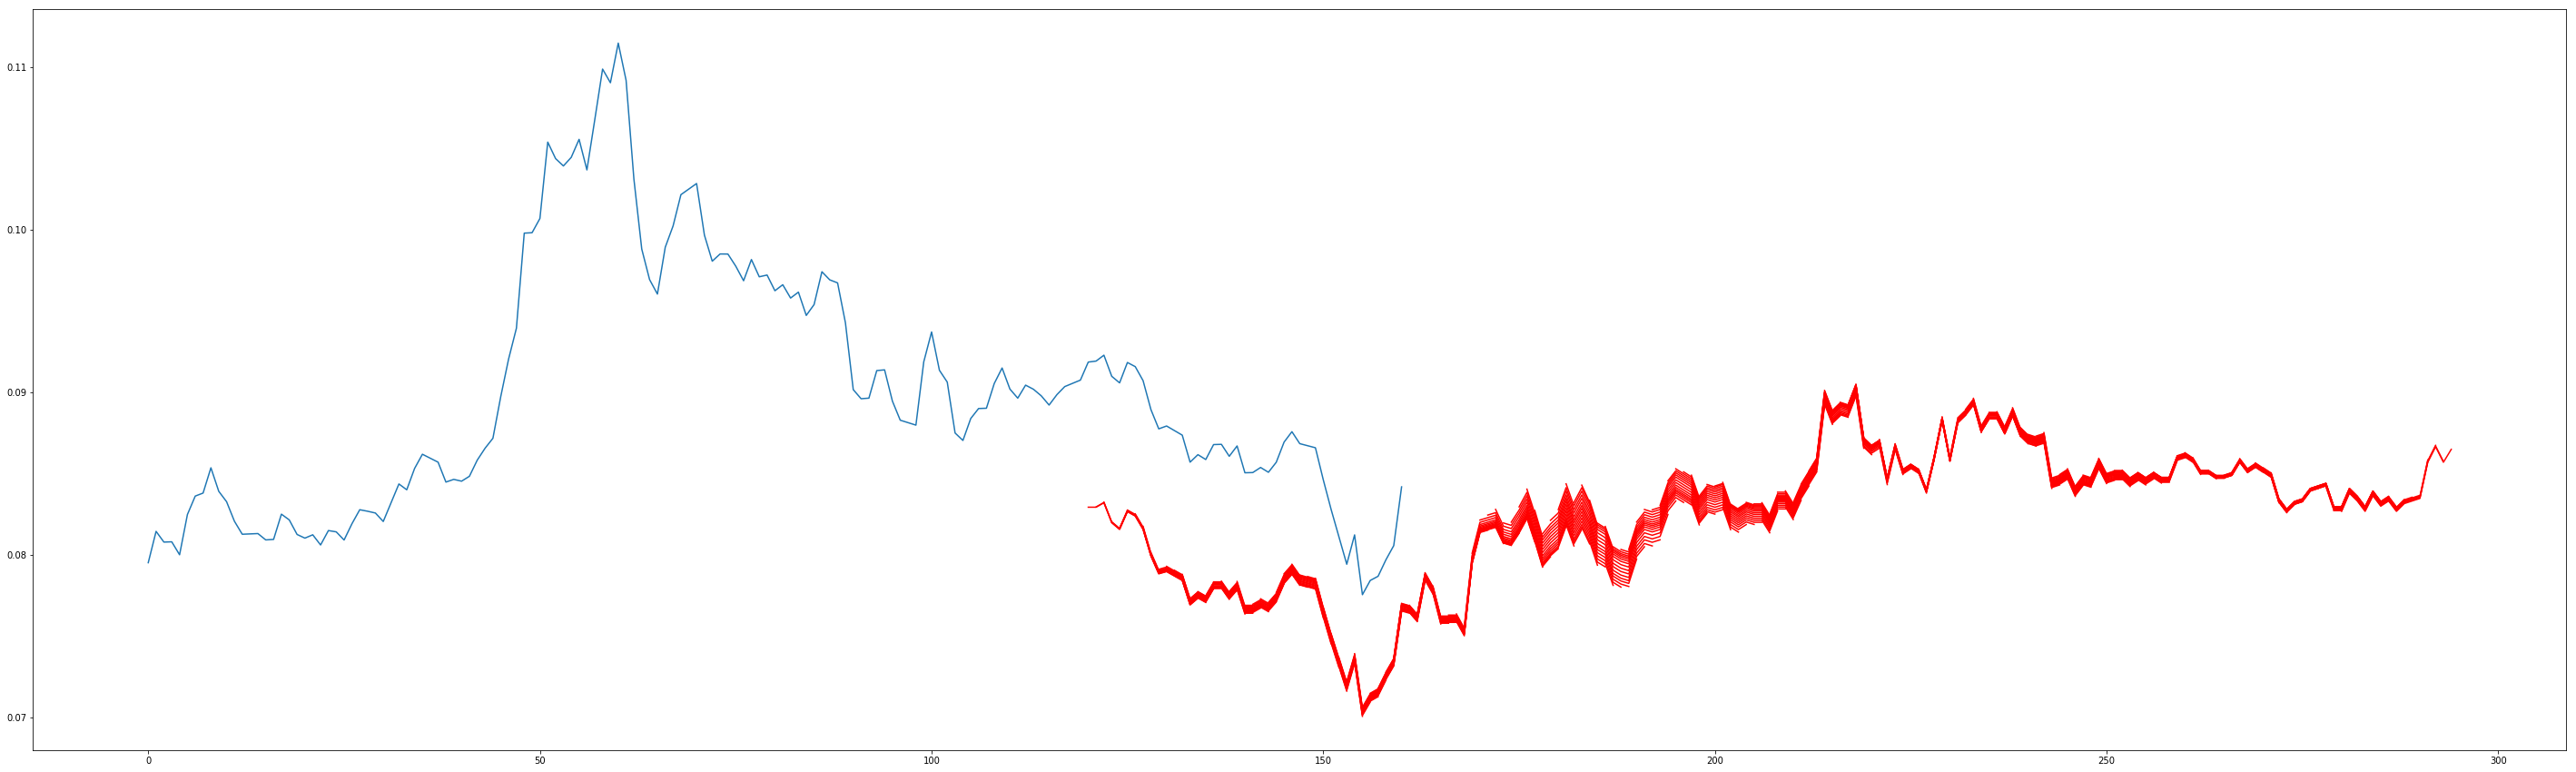

In [10]:
X_val,Y_val=dataloader.get_valid_data(window,days,norm)
plot(X_val[:,0,0],list(Y_val),window=window,step=1)
Y_pred=model.predict(X_val,{ 'verbose': 2})

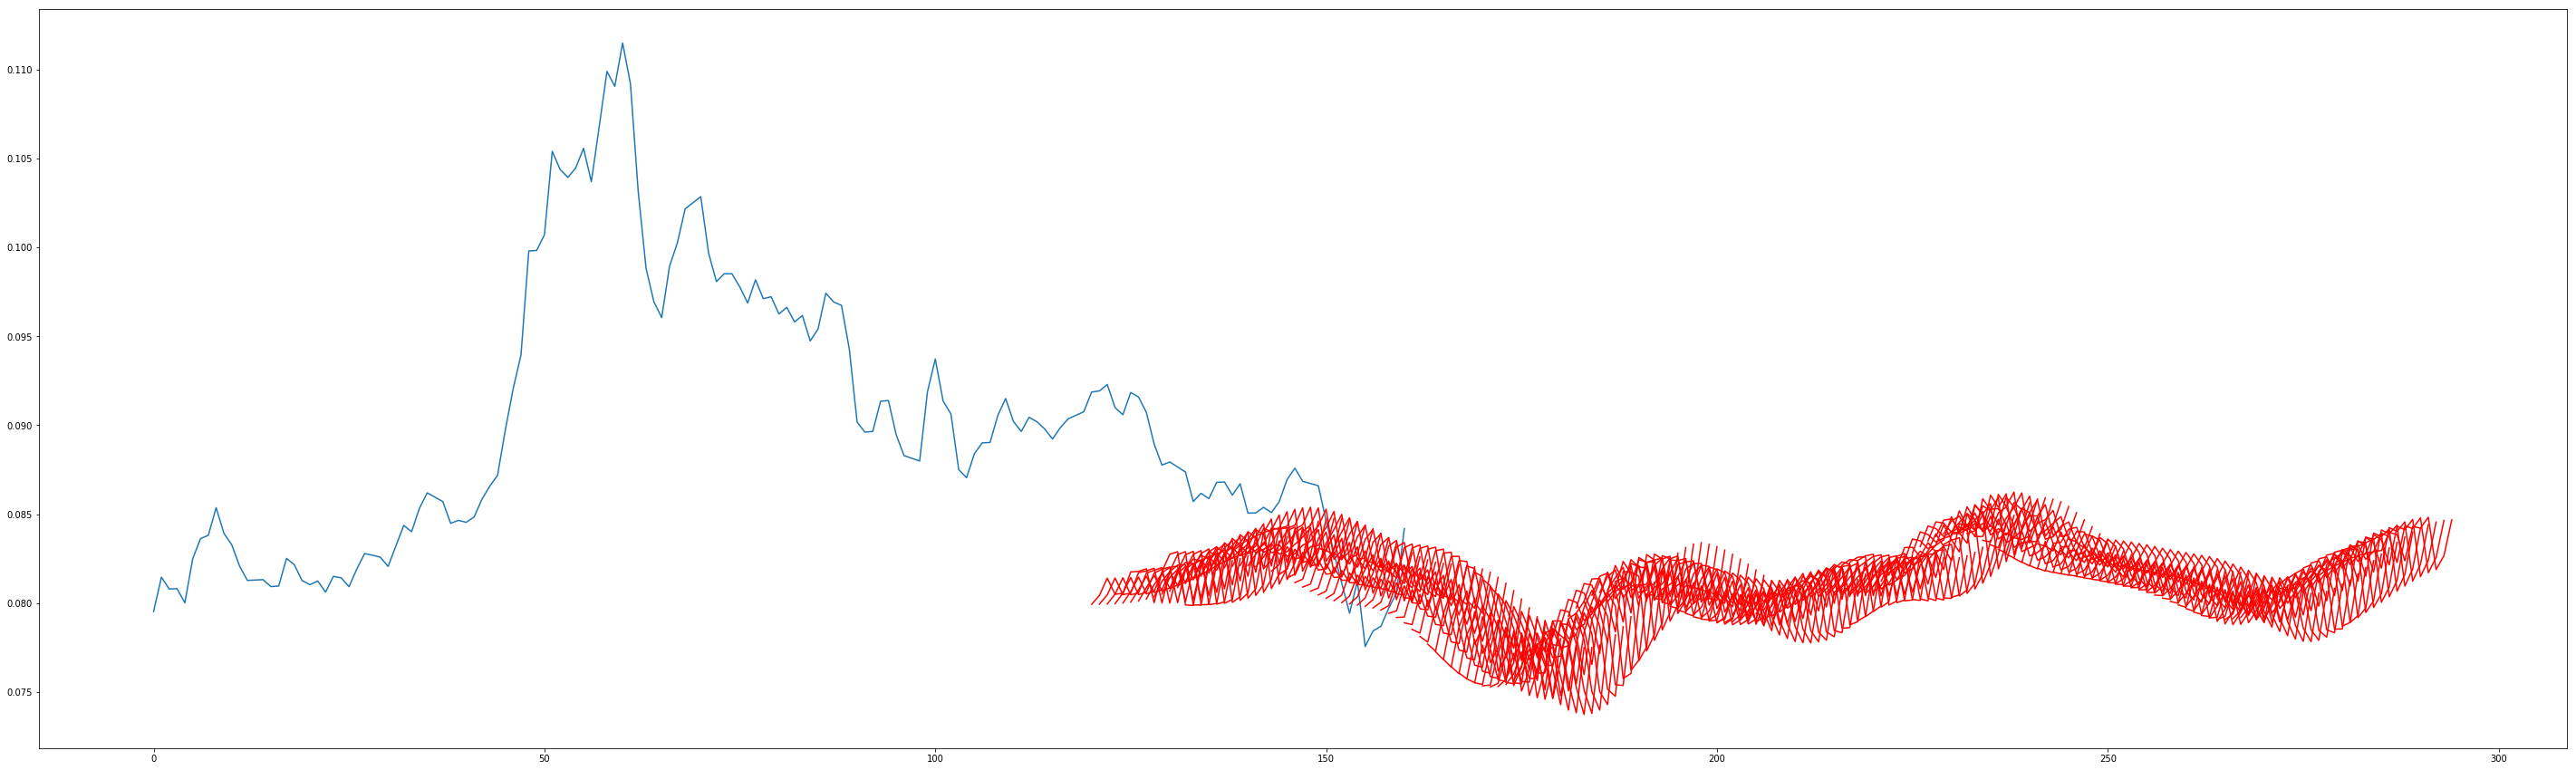

In [11]:
Y_pred=model.predict(X_val,{ 'verbose': 2})
plot(X_val[:,0,0],list(Y_pred),window=window,step=1)

In [12]:
import datetime
start_online=(dataloader.data.index[-1]+datetime.timedelta(days=-(window+days)*2)).strftime('%Y-%m-%d')
print(start_online)
online_data=DataLoader('601398', '399300',split=0,online=True,start=start_online)
online_data.data.shape

2018-04-29


QUANTAXIS>> Selecting the Best Server IP of TDX


USING DEFAULT STOCK IP
️Bad FUTUREIP REPSONSE 124.74.236.94
DEFAULT FUTURE IP is BAD, RETESTING
️Bad FUTUREIP REPSONSE 124.74.236.94
️Bad FUTUREIP REPSONSE 112.74.214.43
️Bad FUTUREIP REPSONSE 120.24.0.77
️Bad FUTUREIP REPSONSE 106.14.95.149
️Bad FUTUREIP REPSONSE 119.97.185.5
️Bad FUTUREIP REPSONSE 202.103.36.71
BAD RESPONSE 59.175.238.38
BAD RESPONSE 113.105.142.136
BAD RESPONSE 61.152.107.141
BAD RESPONSE 61.152.107.171
BAD RESPONSE 119.147.86.171
️Bad FUTUREIP REPSONSE 47.92.127.181


QUANTAXIS>> === The BEST SERVER ===
 stock_ip 180.153.39.51 future_ip 124.74.236.94


(214, 10)

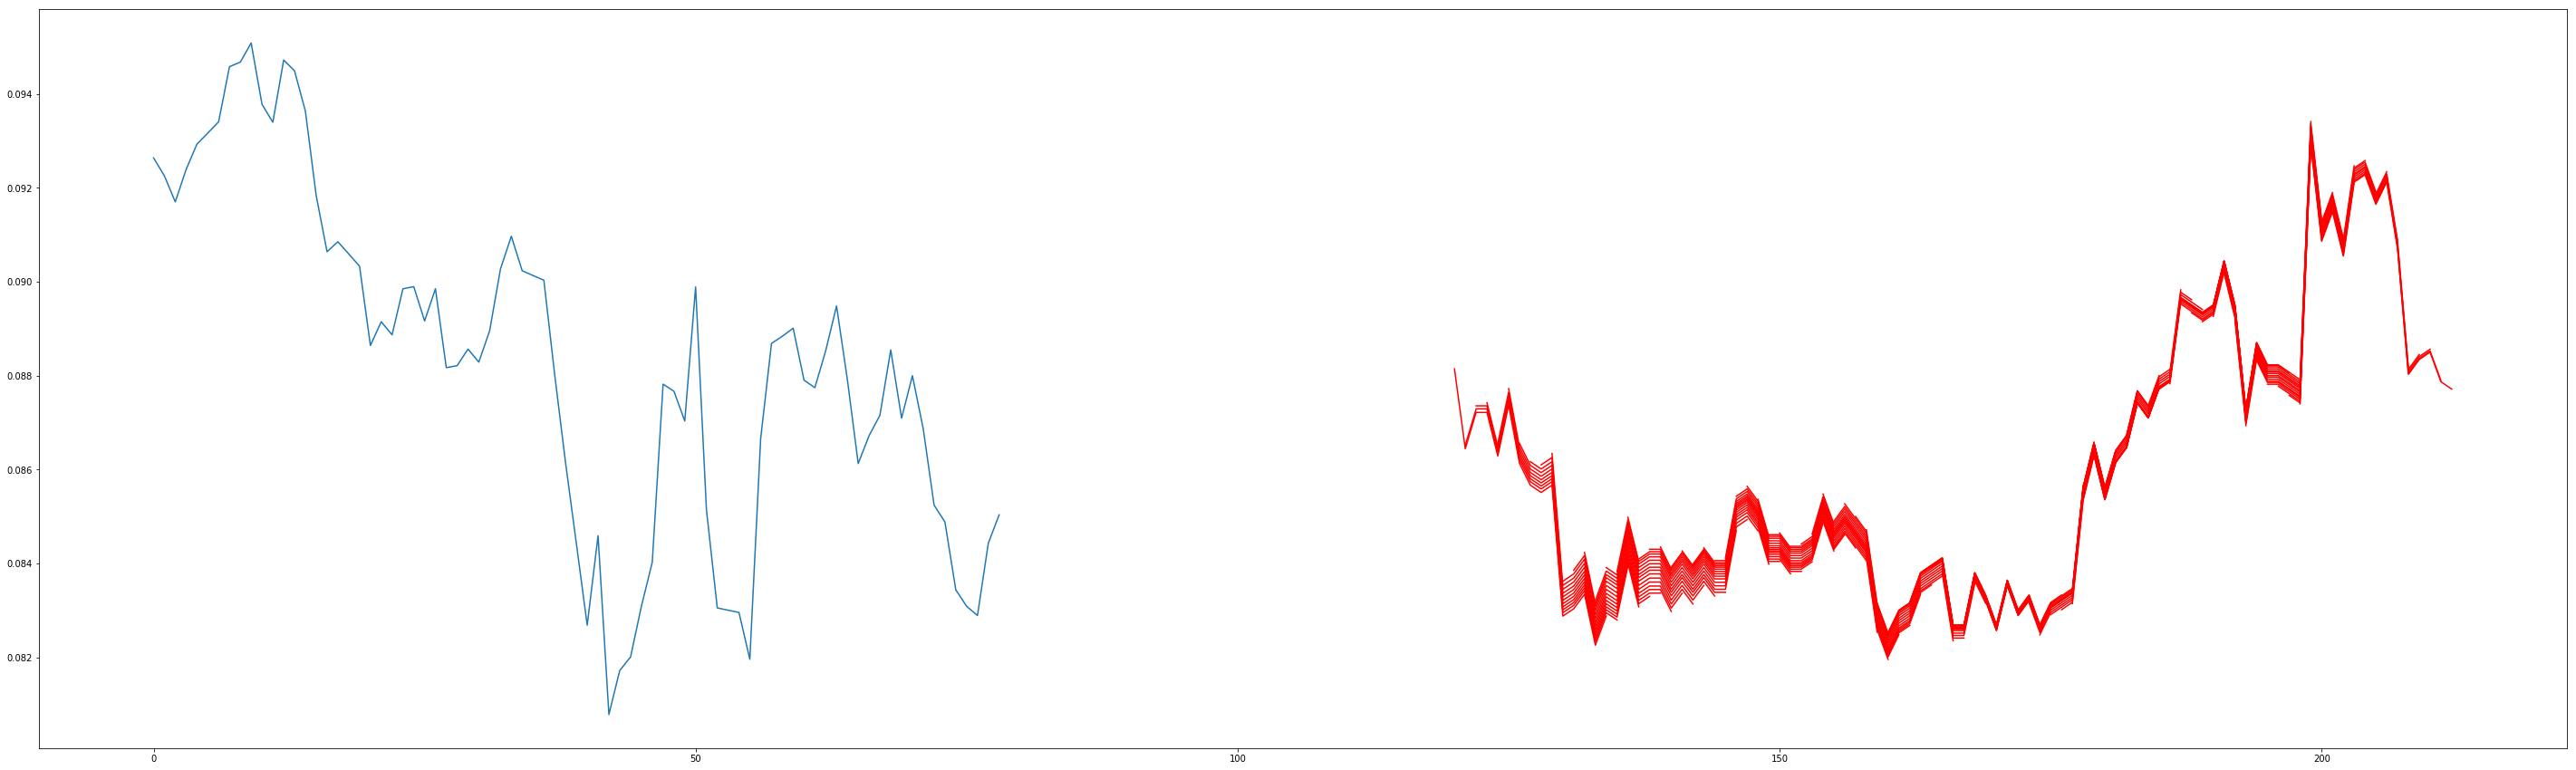

In [13]:
X_online,Y_online=online_data.get_train_data(window,days,norm)
plot(X_online[:,0,0],list(Y_online),window=window,step=1)

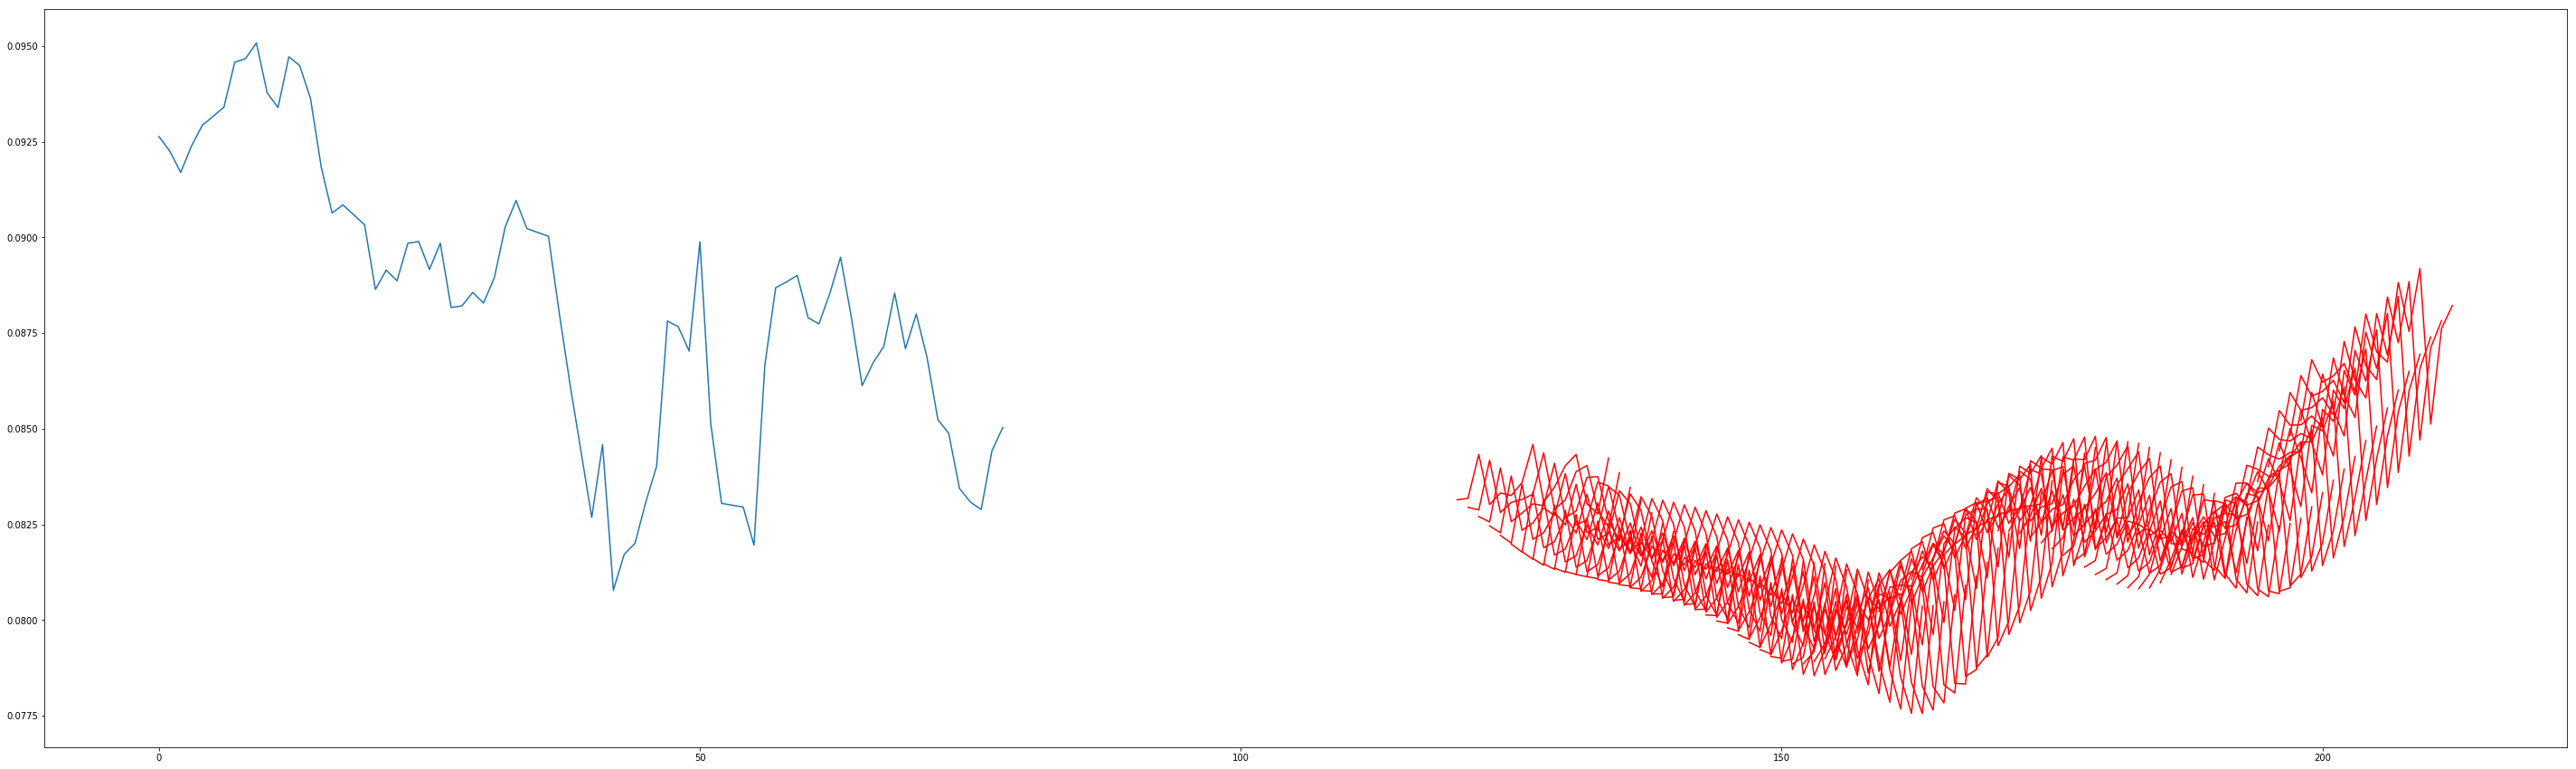

In [14]:

Y_pred_online=model.predict(X_online,{ 'verbose': 2})
plot(X_online[:,0,0],list(Y_pred_online),window=window,step=1)